Loaded 4 episodic logs and 4 step-based logs


/tmp/ipykernel_428108/2902770068.py:57: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_428108/2902770068.py:58: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(SAVE_DIR, "episodic_total_reward.png"))
/home/kim_hatting/School/Topics in CS 1/FinalAss1/RLagentsUsingSB/venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


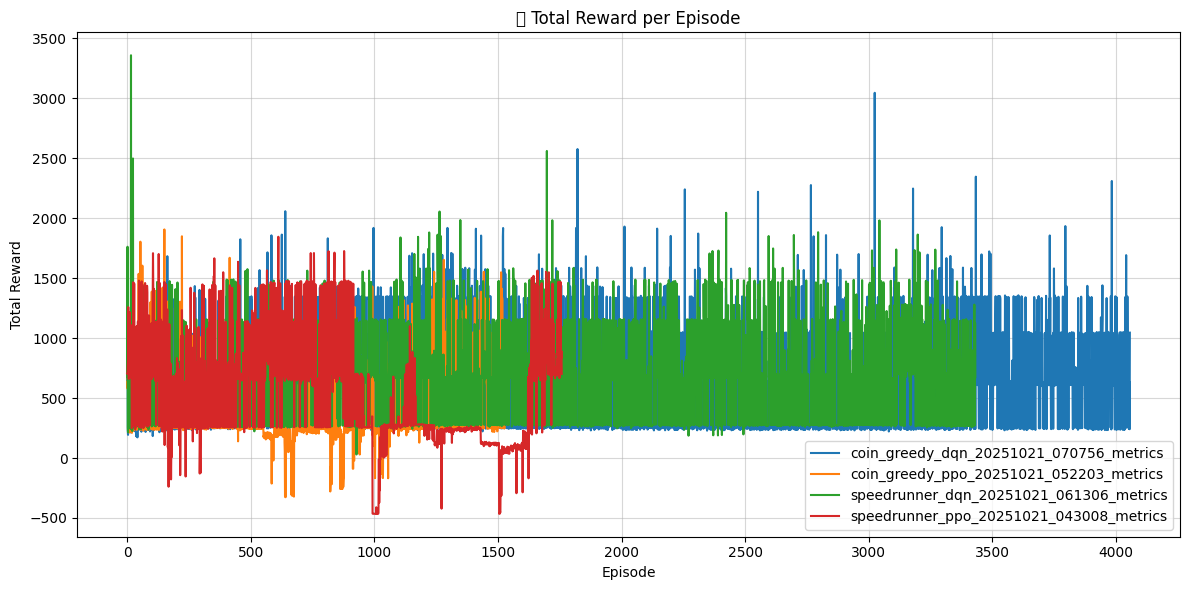

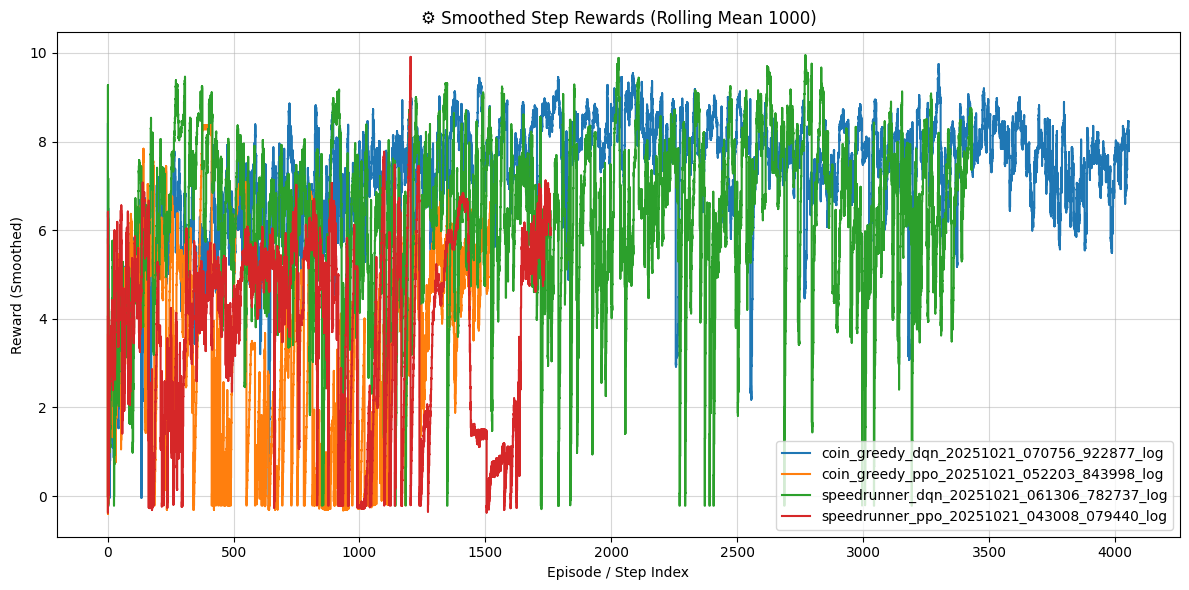

/tmp/ipykernel_428108/2902770068.py:90: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_428108/2902770068.py:91: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(SAVE_DIR, "epsilon_decay.png"))
/home/kim_hatting/School/Topics in CS 1/FinalAss1/RLagentsUsingSB/venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


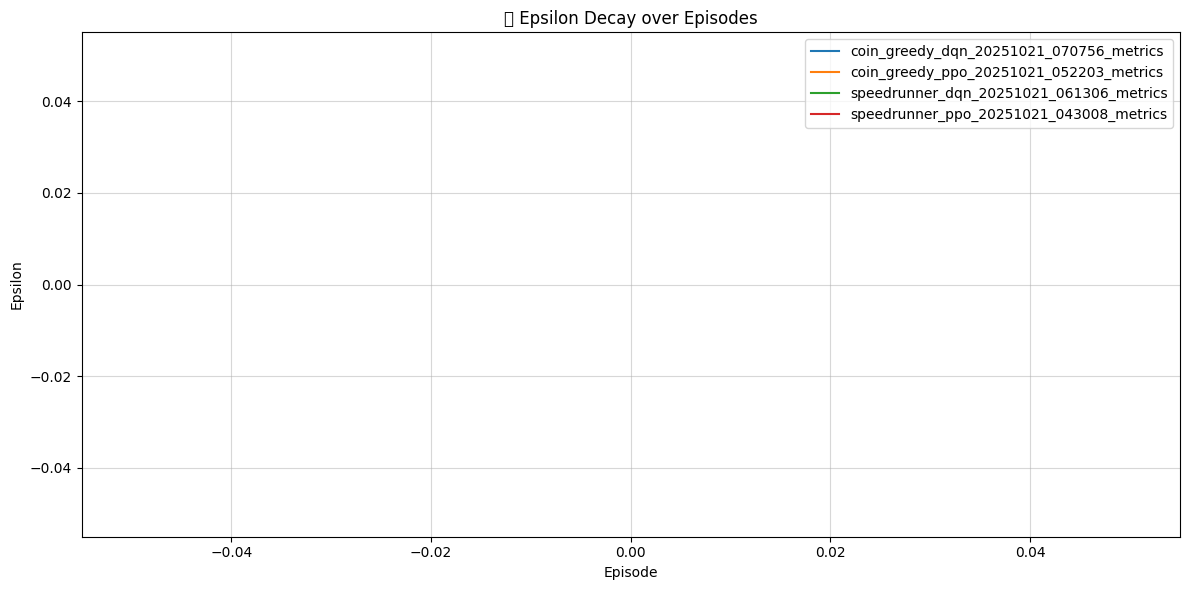

,log_name,final_reward,avg_last_10,final_epsilon
0,coin_greedy_dqn_20251021_070756_metrics,1045.00000,588.730000,NaN
1,coin_greedy_ppo_20251021_052203_metrics,622.00000,605.940000,NaN
2,speedrunner_dqn_20251021_061306_metrics,673.61530,702.430911,NaN
3,speedrunner_ppo_20251021_043008_metrics,701.38525,929.736193,NaN


✅ Summary saved at plots/training_summary.csv


In [1]:
# =========================================================
# 📊 DRL Training Log Analysis (Mario Personas)
# ---------------------------------------------------------
# Run this from inside the `data/` folder
# Reads:
#   - logs/              → step-based logs
#   - training_metrics/  → episodic metrics
# Outputs:
#   - plots/*.png
#   - summary CSV
# =========================================================

import os
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1️⃣ Paths
# ------------------------------------------------------------
STEP_DIR = "logs"
EPISODE_DIR = "training_metrics"
SAVE_DIR = "plots"
os.makedirs(SAVE_DIR, exist_ok=True)

# ------------------------------------------------------------
# 2️⃣ Helpers
# ------------------------------------------------------------
def load_csvs(folder):
    data = {}
    for file in os.listdir(folder):
        if file.endswith(".csv"):
            path = os.path.join(folder, file)
            try:
                df = pd.read_csv(path)
                data[file.replace(".csv", "")] = df
            except Exception as e:
                print(f"⚠️ Could not load {file}: {e}")
    return data

episodic_logs = load_csvs(EPISODE_DIR)
step_logs = load_csvs(STEP_DIR)

print(f"Loaded {len(episodic_logs)} episodic logs and {len(step_logs)} step-based logs")

# ------------------------------------------------------------
# 3️⃣ Episodic metrics visualization
# ------------------------------------------------------------
plt.figure(figsize=(12,6))
for name, df in episodic_logs.items():
    if {"episode","total_reward"}.issubset(df.columns):
        plt.plot(df["episode"], df["total_reward"], label=name)
plt.title("🎯 Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "episodic_total_reward.png"))
plt.show()

# ------------------------------------------------------------
# 4️⃣ Step-based smoothed reward
# ------------------------------------------------------------
plt.figure(figsize=(12,6))
for name, df in step_logs.items():
    if {"episode","reward"}.issubset(df.columns):
        df["reward_smooth"] = df["reward"].rolling(1000, min_periods=1).mean()
        plt.plot(df["episode"], df["reward_smooth"], label=name)
plt.title("⚙️ Smoothed Step Rewards (Rolling Mean 1000)")
plt.xlabel("Episode / Step Index")
plt.ylabel("Reward (Smoothed)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "step_reward_smooth.png"))
plt.show()

# ------------------------------------------------------------
# 5️⃣ Optional: Epsilon decay visualization
# ------------------------------------------------------------
plt.figure(figsize=(12,6))
for name, df in episodic_logs.items():
    if {"episode","epsilon"}.issubset(df.columns):
        plt.plot(df["episode"], df["epsilon"], label=name)
plt.title("🧠 Epsilon Decay over Episodes")
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, "epsilon_decay.png"))
plt.show()

# ------------------------------------------------------------
# 6️⃣ Summary table (final 10 episodes average)
# ------------------------------------------------------------
summary = []
for name, df in episodic_logs.items():
    if "total_reward" in df.columns:
        summary.append({
            "log_name": name,
            "final_reward": df["total_reward"].iloc[-1],
            "avg_last_10": df["total_reward"].tail(10).mean(),
            "final_epsilon": df["epsilon"].iloc[-1] if "epsilon" in df.columns else None
        })
summary_df = pd.DataFrame(summary)
display(summary_df)
summary_path = os.path.join(SAVE_DIR, "training_summary.csv")
summary_df.to_csv(summary_path, index=False)
print(f"✅ Summary saved at {summary_path}")


In [2]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir] [--paths] [--json] [--debug] [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab labextension labhub migrate nbconvert notebook run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [3]:
# =========================================================
# 2️⃣ Individual Plot Generator
# ---------------------------------------------------------
# Lets you pick one log file and visualize its metrics
# =========================================================

import ipywidgets as widgets
from IPython.display import display, clear_output

# Combine episodic and step logs in one selector
all_logs = {**episodic_logs, **step_logs}
log_names = sorted(all_logs.keys())

dropdown = widgets.Dropdown(
    options=log_names,
    description="Select Log:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)

def plot_selected_log(name):
    clear_output(wait=True)
    display(dropdown)
    df = all_logs[name]
    print(f"📄 Plotting: {name} | {len(df)} entries")

    # --------- Identify type ----------
    if {"total_reward","epsilon"}.issubset(df.columns):
        print("Type: Episodic metrics")

        fig, axes = plt.subplots(1, 3, figsize=(18,5))
        # Total reward
        axes[0].plot(df["episode"], df["total_reward"], color='tab:blue')
        axes[0].set_title("Total Reward per Episode")
        axes[0].set_xlabel("Episode")
        axes[0].set_ylabel("Total Reward")
        axes[0].grid(alpha=0.5)

        # Average reward
        axes[1].plot(df["episode"], df["avg_reward"], color='tab:green')
        axes[1].set_title("Average Reward per Episode")
        axes[1].set_xlabel("Episode")
        axes[1].set_ylabel("Avg Reward")
        axes[1].grid(alpha=0.5)

        # Epsilon decay
        axes[2].plot(df["episode"], df["epsilon"], color='tab:orange')
        axes[2].set_title("Epsilon Decay")
        axes[2].set_xlabel("Episode")
        axes[2].set_ylabel("Epsilon")
        axes[2].grid(alpha=0.5)

        fig.suptitle(f"Training Metrics — {name}")
        plt.tight_layout()
        plt.show()

    elif {"reward","x_pos"}.issubset(df.columns):
        print("Type: Step-based log")

        fig, axes = plt.subplots(1, 3, figsize=(18,5))
        # Reward over time
        df["reward_smooth"] = df["reward"].rolling(500, min_periods=1).mean()
        axes[0].plot(df["episode"], df["reward_smooth"], color='tab:blue')
        axes[0].set_title("Smoothed Reward (500 window)")
        axes[0].set_xlabel("Step / Episode")
        axes[0].set_ylabel("Reward")
        axes[0].grid(alpha=0.5)

        # X-position progress
        axes[1].plot(df["episode"], df["x_pos"], color='tab:green')
        axes[1].set_title("Mario X-Position Progress")
        axes[1].set_xlabel("Step / Episode")
        axes[1].set_ylabel("x_pos")
        axes[1].grid(alpha=0.5)

        # Coin / score accumulation
        if "coins" in df.columns and "score" in df.columns:
            axes[2].plot(df["episode"], df["coins"], label="Coins", color='tab:orange')
            axes[2].plot(df["episode"], df["score"], label="Score", color='tab:red')
            axes[2].set_title("Coins & Score")
            axes[2].set_xlabel("Step / Episode")
            axes[2].legend()
            axes[2].grid(alpha=0.5)

        fig.suptitle(f"Step Metrics — {name}")
        plt.tight_layout()
        plt.show()

    else:
        print("❌ Unknown format — not plotted")

# Attach event handler
def on_select(change):
    if change["type"] == "change" and change["name"] == "value":
        plot_selected_log(change["new"])

dropdown.observe(on_select)
display(dropdown)



Dropdown(description='Select Log:', layout=Layout(width='60%'), options=('coin_greedy_dqn_20251021_070756_9228…

In [4]:
# =========================================================
# 📈 Part 2 — Generate Each Plot Separately (No Widgets)
# ---------------------------------------------------------
# Creates one PNG per CSV in data/logs and data/training_metrics
# =========================================================

import matplotlib.pyplot as plt

# Output folder for all per-file plots
os.makedirs(SAVE_DIR, exist_ok=True)

# ---------------------------
# Episodic metrics plots
# ---------------------------
for name, df in episodic_logs.items():
    print(f"🎯 Generating episodic plots for: {name}")

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"Episodic Metrics — {name}")

    # Total Reward
    if "total_reward" in df.columns:
        axes[0].plot(df["episode"], df["total_reward"], color="tab:blue")
        axes[0].set_title("Total Reward per Episode")
        axes[0].set_xlabel("Episode")
        axes[0].set_ylabel("Total Reward")
        axes[0].grid(alpha=0.5)

    # Average Reward
    if "avg_reward" in df.columns:
        axes[1].plot(df["episode"], df["avg_reward"], color="tab:green")
        axes[1].set_title("Average Reward per Episode")
        axes[1].set_xlabel("Episode")
        axes[1].set_ylabel("Average Reward")
        axes[1].grid(alpha=0.5)

    # Epsilon
    if "epsilon" in df.columns:
        axes[2].plot(df["episode"], df["epsilon"], color="tab:orange")
        axes[2].set_title("Epsilon Decay")
        axes[2].set_xlabel("Episode")
        axes[2].set_ylabel("Epsilon")
        axes[2].grid(alpha=0.5)

    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_DIR, f"{name}_episodic_metrics.png"))
    plt.close(fig)

print("✅ Saved all episodic plots.")


# ---------------------------
# Step-based metrics plots
# ---------------------------
for name, df in step_logs.items():
    print(f"⚙️ Generating step-based plots for: {name}")

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"Step-based Metrics — {name}")

    # Smoothed reward
    if "reward" in df.columns:
        df["reward_smooth"] = df["reward"].rolling(1000, min_periods=1).mean()
        axes[0].plot(df["episode"], df["reward_smooth"], color="tab:blue")
        axes[0].set_title("Smoothed Reward (window=1000)")
        axes[0].set_xlabel("Step / Episode")
        axes[0].set_ylabel("Reward")
        axes[0].grid(alpha=0.5)

    # X-position
    if "x_pos" in df.columns:
        axes[1].plot(df["episode"], df["x_pos"], color="tab:green")
        axes[1].set_title("Mario X-Position Progress")
        axes[1].set_xlabel("Step / Episode")
        axes[1].set_ylabel("x_pos")
        axes[1].grid(alpha=0.5)

    # Coins & score
    if "coins" in df.columns and "score" in df.columns:
        axes[2].plot(df["episode"], df["coins"], label="Coins", color="tab:orange")
        axes[2].plot(df["episode"], df["score"], label="Score", color="tab:red")
        axes[2].set_title("Coins & Score Accumulation")
        axes[2].set_xlabel("Step / Episode")
        axes[2].legend()
        axes[2].grid(alpha=0.5)

    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_DIR, f"{name}_step_metrics.png"))
    plt.close(fig)

print("✅ Saved all step-based plots.")


🎯 Generating episodic plots for: coin_greedy_dqn_20251021_070756_metrics
🎯 Generating episodic plots for: coin_greedy_ppo_20251021_052203_metrics
🎯 Generating episodic plots for: speedrunner_dqn_20251021_061306_metrics
🎯 Generating episodic plots for: speedrunner_ppo_20251021_043008_metrics
✅ Saved all episodic plots.
⚙️ Generating step-based plots for: coin_greedy_dqn_20251021_070756_922877_log
⚙️ Generating step-based plots for: coin_greedy_ppo_20251021_052203_843998_log
⚙️ Generating step-based plots for: speedrunner_dqn_20251021_061306_782737_log
⚙️ Generating step-based plots for: speedrunner_ppo_20251021_043008_079440_log
✅ Saved all step-based plots.
